# create CM model


In [1]:
import os
from Bio import AlignIO


In [4]:
stk_folder = '/Users/katringutenbrunner/Desktop/MA/working/cov_model/MBFV_xrRNA1/stk_files/'


In [5]:
stk_files = [stk_folder + file for file in os.listdir(stk_folder) if file.endswith('.stk')]


In [6]:
align = AlignIO.read(stk_files[0], "stockholm")

In [7]:
output_fa = '/Users/katringutenbrunner/Desktop/MA/working/cov_model/MBFV_xrRNA1/stk_files/combined.fa'
with open(output_fa, 'w') as f:
    for stk_file in stk_files:
        align = AlignIO.read(stk_file, "stockholm")
        for record in align:
            
            f.write(f'>{record.id}\n')
            f.write(f'{record.seq}\n')
            f.write(f"{align.column_annotations['secondary_structure']} #S\n")

In [32]:
!mlocarna $output_fa

mLocARNA --- multiple Local (and global) Alignment of RNA --- LocARNA 2.0.0

^C


In [8]:
alifold = '...(((((((((.......)))).(((((.............)))))..)))))...............'

In [9]:
import re

def extract_basepair_data(file_path):

    with open(file_path, "r") as file:
        content = file.read()


    start_delimiter = "% Start Annotations"
    end_delimiter = "% End Annotations"
    data = content.split(start_delimiter)[1].split(end_delimiter)[0].strip()

    pattern = r"(\d+)\s+(\d+)\s+([\d\.]+)\s+([\d\.]+)\s+colorpair"
    matches = re.findall(pattern, data)

    color_map = {
        "0.32": "green",
        "0.16": "orange",
        "0.0": "red"
    }

    transformed_data = []
    for match in matches:
        pos1, pos2, color, alpha = match
        transformed_data.append((int(pos1), int(pos2)))
    
    return transformed_data


In [10]:
mlocarna_file = '/Users/katringutenbrunner/Desktop/MA/working/cov_model/MBFV_xrRNA1/stk_files/combined.out/results/alirna.ps'
extract_basepair_data(mlocarna_file)


[(4, 54),
 (5, 53),
 (6, 52),
 (7, 51),
 (8, 50),
 (9, 23),
 (25, 47),
 (27, 45),
 (28, 44)]

In [11]:
from Bio import AlignIO
input_file = '/Users/katringutenbrunner/Desktop/MA/working/cov_model/MBFV_xrRNA1/stk_files/combined.out/results/result.aln'
stk_file = '/Users/katringutenbrunner/Desktop/MA/working/cov_model/MBFV_xrRNA1/alignment.stk'
# Load the Clustal alignment
alignment = AlignIO.read(input_file, "clustal")

alignment.column_annotations["secondary_structure_cons"] = alifold
alignment.column_annotations['secondary_structure'] = alifold

# Write the alignment in Stockholm format
AlignIO.write(alignment, stk_file, "stockholm")


1

In [80]:
#!cmbuild /scr/aldea/kgutenbrunner/working/cov_model/MBFV_xrRNA1/MBFV_xrRNA1.cm $stk_file

# cmbuild :: covariance model construction from multiple sequence alignments
# INFERNAL 1.1.5 (Sep 2023)
# Copyright (C) 2023 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# CM file:                                            /scr/aldea/kgutenbrunner/working/cov_model/MBFV_xrRNA1/MBFV_xrRNA1.cm
# alignment file:                                     /scr/aldea/kgutenbrunner/working/cov_model/MBFV_xrRNA1/alignment.stk
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#                                                                      rel entropy
#                                                                      -----------
# idx    name                     nseq eff_nseq   alen  clen  bps bifs    CM   HMM description
# ------ -------------------- -------- -------- ------ ----- ---- ---- ----- ----- -----------
       1 alignment                

# Analysis of diversity of CM designs


## load data

In [12]:
import pandas as pd
import RNA
import numpy as np
from Bio import AlignIO


In [13]:
def get_mfe(sequence):
    fc = RNA.fold_compound(sequence)
    fc.pf()
    (ss, mfe) = fc.mfe()
    return ss, mfe

In [92]:
# cm_model_noss = '/scr/aldea/kgutenbrunner/working/cov_model/MBFV_xrRNA1/MBFV_xrRNA1_noss.cm'
# designs_file_noss = '/scr/aldea/kgutenbrunner/working/cov_model/MBFV_xrRNA1/designed_sequences_noss.out'


cm_model = '/Users/katringutenbrunner/Desktop/MA/working/cov_model/MBFV_xrRNA1/MBFV_xrRNA1.cm'
designs_file = '/Users/katringutenbrunner/Desktop/MA/working/cov_model/MBFV_xrRNA1/designed_sequences.out'

In [93]:
cmemit = '/Users/katringutenbrunner/Desktop/MA/working/opt/infernal-1.1.5-macosx-silicon/src/cmemit'

# create 100 sequences
#!cmemit -N 100 -a -o $designs_file_noss $cm_model_noss

# create 100 sequences
!$cmemit -N 100 -a -o $designs_file $cm_model

In [94]:
align = AlignIO.read(designs_file, "stockholm")


In [95]:
align.column_annotations

{'reference_annotation': 'AGUC.AGGCCa....gcaAa...U..gcuG.CCACcGg..Aaguu.G.A..GuAaACgGUGCUGCCUGu.GA..............C..UCaAc.c..',
 'secondary_structure': ':::(.((((<<....<<___..._..>>>>.,<<<<<_.._____._._.._____>>>>>,,))))):.::..............:..:::::.:..'}

In [17]:
SS_cons = align.column_annotations['secondary_structure']
RF = align.column_annotations['reference_annotation']

Text(0, 0.5, 'Counts')

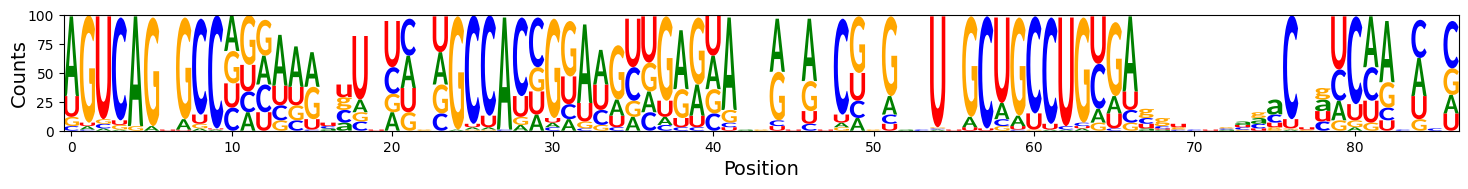

In [43]:
#Creating Counts Sequence Logo
import logomaker
from Bio import AlignIO
import matplotlib.pyplot as plt

alignment = AlignIO.read(designs_file, "stockholm")

sequences = [str(record.seq) for record in alignment]
alignment_df = logomaker.alignment_to_matrix(sequences)

logo = logomaker.Logo(alignment_df, figsize=(18,1.5), font_name='Carlito', color_scheme="classic")

logo.ax.set_xlabel('Position',fontsize=14)
logo.ax.set_ylabel("Counts", labelpad=-1,fontsize=14)

In [24]:
plt.show()

In [20]:
# plt.savefig('/scr/aldea/kgutenbrunner/working/cov_model/MBFV_xrRNA1/logo.pdf')


<Figure size 640x480 with 0 Axes>

## shannon entropy

In [18]:
import numpy as np
import varnaapi
from Bio import AlignIO
from Bio import SeqIO
import matplotlib.pyplot as plt



In [ ]:


alignment = AlignIO.read(designs_file, "stockholm")
n = alignment.get_alignment_length()
N = len(alignment)

shannon_entropies = []
chars = list('ACGU')
for i in range(n):
    col = alignment[:, i].upper()
    unique_chars = set(col)
    frequencies = [ col.count(char)/N for char in unique_chars]
    shannon = - np.sum([freq * np.log2(freq) for freq in frequencies])
    shannon_entropies.append(shannon)

seq = RF
ss = SS_cons
v = varnaapi.Structure(sequence=seq, structure=ss)


v.update(baseNum='black', drawBackbone=True, drawBases=True, fillBases=True, spaceBetweenBases=1, flat=True, resolution=2.5)
v.add_colormap(shannon_entropies, vMin=0, vMax=2, style='energy')

#v.flip(100)
v.savefig('/scr/aldea/kgutenbrunner/working/thesis/images/CM_shannon_entropy.png')
v.show()

## base pairing heatmap

In [19]:
def get_mfe(sequence):
    fc = RNA.fold_compound(sequence)
    fc.pf()
    (ss, mfe) = fc.mfe()
    return ss, mfe

def get_mfe_w_gaps(sequence):
    fc = RNA.fold_compound(sequence.replace('-', ''))
    fc.pf()
    (ss, mfe) = fc.mfe()
    return add_gaps(sequence, ss)


def remove_positioned_gaps(sequence, structure):
    remove = [i for i, nt in enumerate(sequence) if nt == '-']
    new_ss = [structure[i] for i in range(len(structure)) if i not in remove]
    return ''.join(new_ss)


def add_gaps(sequence, structure):
    structure = list(structure)
    new_ss = [structure.pop(0) if nt != '-' else '-' for  nt in sequence]
    return ''.join(new_ss)

def db_to_matrix(db):
    matrix = np.zeros((len(db), len(db)), dtype=int)
    db_dict = {')': '(',
               ']': '[',
               '}': '{',
               '>': '<',
               'a': 'A'}
    db_stacks = {'(':[],
               '[':[],
               '{':[],
               '<':[],
               'A': []
               }

    for i, symbol in enumerate(db):
        if symbol in db_stacks.keys():
            db_stacks[symbol].append(i)
        elif symbol in ')}]>a':
            opening_index = db_stacks[db_dict[symbol]].pop()
            closing_index = i
            matrix[opening_index][closing_index] = 1
            matrix[closing_index][opening_index] = 1
    if any(db_stacks.values()):
        print(db)
        print(db_stacks)
        raise ValueError(f"structure {db} not balanced ")
    return matrix

def bp_plot(bp_matrix, folder = False):

    #result_matrix = result_matrix / len(structs)

    fig, ax = plt.subplots()
    cimg = ax.imshow(bp_matrix, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
    ax.set_xticks(np.arange(0, bp_matrix.shape[1], 5), np.arange(0, bp_matrix.shape[1], 5))
    ax.set_yticks(np.arange(0, bp_matrix.shape[0], 5), np.arange(0, bp_matrix.shape[0], 5))
    ax.set_title('MFE probability')
    ax.grid(color='gray', linestyle='--', linewidth=0.4)
    cbar = plt.colorbar(cimg, ax=ax)

    cbar_ax = cbar.ax  # Access the color bar's axes
    max_value = np.max(bp_matrix)
    cbar_ax.axhline(y=max_value, color='red', linestyle='--')  # Add a horizontal line


    if folder:
        plt.savefig(folder)
        plt.clf()
    else:
        plt.show()
        plt.clf()

In [20]:

structures = []
records = list(SeqIO.parse(designs_file, "stockholm"))
for record in records:
    seq = str(record.seq)

    structures.append(get_mfe_w_gaps(seq))

n = len(structures[0])
N = len(structures)
bps = np.zeros((n, n))

for ss in structures:   
    bps += db_to_matrix(ss)

Ns = []
for i in range(n):
   Ns.append(len(''.join([ss[i] for ss in structures]).replace('-', '')))
Ns = np.array(Ns)

bps /= N
# bps /=  Ns
 
bps


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.01],
       ...,
       [0.  , 0.01, 0.02, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.01, ..., 0.  , 0.  , 0.  ]])

In [133]:
np.max(np.nan_to_num(bps))

0.33

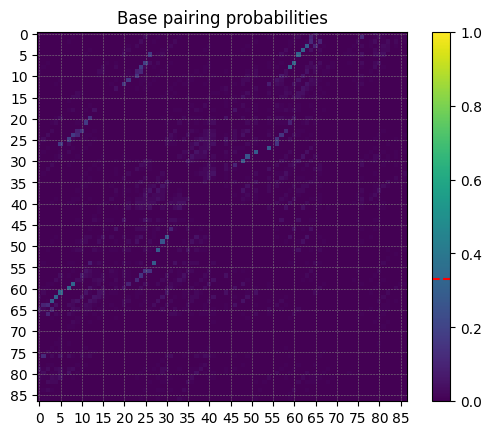

<Figure size 640x480 with 0 Axes>

In [130]:
bp_plot(np.nan_to_num(bps))

In [131]:
bp_plot(np.nan_to_num(bps), folder = '/scr/aldea/kgutenbrunner/working/thesis/images/CM_basepairs.png')

<Figure size 640x480 with 0 Axes>

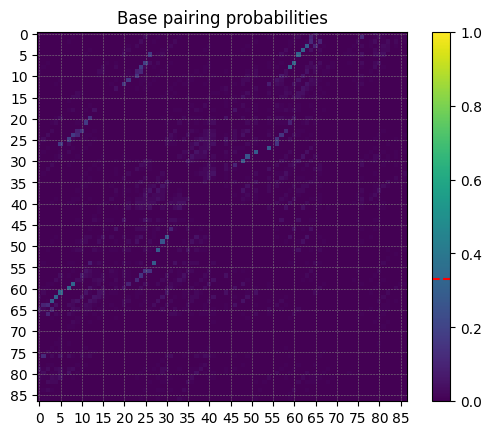

In [127]:
bp_matrix = np.nan_to_num(bps)

fig, ax = plt.subplots()
cimg = ax.imshow(bp_matrix, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
ax.set_xticks(np.arange(0, bp_matrix.shape[1], 5), np.arange(0, bp_matrix.shape[1], 5))
ax.set_yticks(np.arange(0, bp_matrix.shape[0], 5), np.arange(0, bp_matrix.shape[0], 5))
ax.set_title('Base pairing probabilities')
ax.grid(color='gray', linestyle='--', linewidth=0.4)
cbar = plt.colorbar(cimg, ax=ax)

cbar_ax = cbar.ax  # Access the color bar's axes
max_value = np.max(bp_matrix)
cbar_ax.axhline(y=max_value, color='red', linestyle='--')  # Add a horizontal line



plt.show()


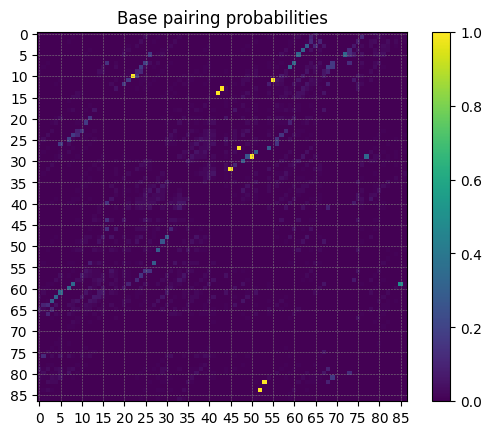

<Figure size 640x480 with 0 Axes>

In [91]:
bp_plot(np.nan_to_num(bps))

## length distribution

In [49]:
sequence_lengths = []

for record in records:
    seq = str(record.seq).replace('-', '')
    sequence_lengths.append(len(seq))

(array([ 3.,  4., 12., 19., 29., 23.,  5.,  3.,  1.,  1.]),
 array([52., 54., 56., 58., 60., 62., 64., 66., 68., 70., 72.]),
 <BarContainer object of 10 artists>)

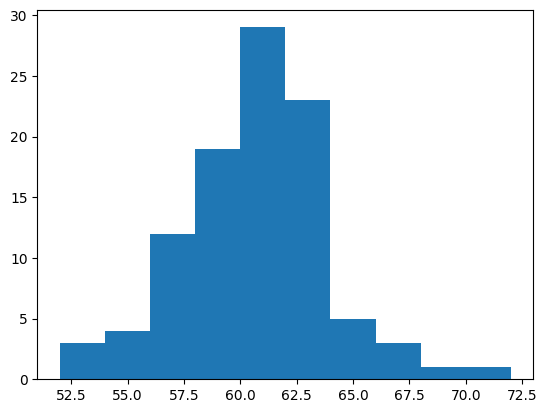

In [18]:
plt.hist(sequence_lengths)

## structure parts analysis

In [25]:
from Bio import AlignIO
from Bio import SeqIO
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
records = list(SeqIO.parse(designs_file, "stockholm"))
seq = str(records[0].seq)
print(SS_cons)
print('0123456789' * 10)

:::(((.((<<<<___.._.>>.>>,<<<<<___________.._._.>>.>..>.>,,))))):::.........:..::::.:.:
0123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789


In [27]:
def get_length(seq):
    return len(seq.replace('-', ''))

def find_character(text, char):
    return [i for i, c in enumerate(text) if c == char]


def find_structure(ss):
    beta_indices = []
    gamma_indices = []       

    beta_stack = []
    gamma_stack = []

    beta = True
    for i in range(len(ss)):
        if ss[i] == '<':
            if beta:
                beta_stack.append(i)
                beta_indices.append(i)
            else:
                gamma_stack.append(i)
                gamma_indices.append(i)
        elif ss[i] == '>':
            if beta:
                beta_stack.pop()
                beta_indices.append(i)
            else:
                gamma_stack.pop()
                gamma_indices.append(i)
            if len(beta_stack) == 0:
                beta = False
    if beta_stack or gamma_stack:
        print('structure is wrong')
        raise ValueError


    alpha_indices = find_character(ss, '(') + find_character(ss, ')')

    return alpha_indices, beta_indices, gamma_indices

def count_not_gap(seq, positions):
    return len([i for i in positions if seq[i] != '-'])

In [49]:
print(SS_cons)
print('0123456789' * 9)

:::(((.((<<<<___.._.>>.>>,<<<<<___________.._._.>>.>..>.>,,))))):::.........:..::::.:.:
012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789


In [28]:
find_structure(SS_cons)

([3, 4, 5, 7, 8, 59, 60, 61, 62, 63],
 [9, 10, 11, 12, 20, 21, 23, 24],
 [26, 27, 28, 29, 30, 48, 49, 51, 54, 56])

In [44]:
# automized finding the span of the  if i change the design file
alpha_stem_indices, beta_stem_indices, gamma_stem_indices = find_structure(SS_cons)

n = len(alpha_stem_indices)
alpha_stem_0_span = (alpha_stem_indices[0], alpha_stem_indices[int(n/2)-1] + 1) # start stop
alpha_stem_1_span = (alpha_stem_indices[int(n/2)], alpha_stem_indices[-1] + 1) # start stop
alpha_stem_indices = [3, 4, 5, 7, 8, 59, 60, 61, 62, 63]

n = len(beta_stem_indices)
beta_span = (beta_stem_indices[0], beta_stem_indices[-1] + 1) 
beta_hl_span = (beta_stem_indices[int(n/2)-1] + 1, beta_stem_indices[int(n/2)])
beta_stem_indices = [9, 10, 11, 12, 20, 21, 23, 24]

n = len(gamma_stem_indices)
gamma_span = (gamma_stem_indices[0], gamma_stem_indices[-1] + 1) 
gamma_hl_span = (gamma_stem_indices[int(n/2)-1] + 1, gamma_stem_indices[int(n/2)])
gamma_stem_indices = [26, 27, 28, 29, 30, 48, 49, 51, 54, 56]

In [45]:
alpha_stem_0_span = (3, 9) # start stop
alpha_stem_1_span = (59, 64) # start stop
alpha_stem_indices = [3, 4, 5, 7, 8, 59, 60, 61, 62, 63]

beta_span = (9, 25) 
beta_hl_span = (13, 20)
beta_stem_indices = [9, 10, 11, 12, 20, 21, 23, 24]

gamma_span = (26, 57)
gamma_hl_span = (31, 48)
gamma_stem_indices = [26, 27, 28, 29, 30, 48, 49, 51, 54, 56]

In [46]:
def get_length_of_structures(sequence, ss):
    # alpha = len(alpha_positions)
    alpha_seq = sequence[alpha_stem_0_span[0]:alpha_stem_0_span[1]] + sequence[alpha_stem_1_span[0]:alpha_stem_1_span[1]]
    alpha = get_length(alpha_seq)
    alpha_stem = count_not_gap(sequence, alpha_stem_indices)
    
    beta_seq = sequence[beta_span[0]:beta_span[1]]
    beta = get_length(beta_seq)
    beta_hl = get_length(sequence[beta_hl_span[0]:beta_hl_span[1]])
    beta_stem = count_not_gap(sequence, beta_stem_indices)


    gamma_seq = sequence[gamma_span[0]:gamma_span[1]]
    gamma = get_length(gamma_seq)
    gamma_hl = get_length(sequence[gamma_hl_span[0]:gamma_hl_span[1]])
    gamma_stem = count_not_gap(sequence, gamma_stem_indices)
    return (alpha, alpha_stem), (beta_stem, beta_hl, beta), (gamma_stem, gamma_hl, gamma) 

In [47]:
alpha_lens =[]
alpha_stem_lens =[]

beta_stem_lens =[]
beta_hl_lens =[]
beta_lens=[]
gamma_stem_lens =[]
gamma_hl_lens  = []
gamma_lens  = []


In [48]:
for record in records:
    seq = str(record.seq)

    (alpha, alpha_stem), (beta_stem, beta_hl, beta), (gamma_stem, gamma_hl, gamma) = get_length_of_structures(seq, SS_cons)
    alpha_lens.append(alpha)
    alpha_stem_lens.append(alpha_stem)
    beta_stem_lens.append(beta_stem)
    beta_hl_lens.append(beta_hl)
    beta_lens.append(beta)
    gamma_stem_lens.append(gamma_stem)
    gamma_hl_lens.append(gamma_hl)
    gamma_lens.append(gamma)


In [49]:
lens_dict = {
    'alpha_stems': alpha_lens,
    'alpha_lens': alpha_lens,
    'beta_stem_lens': beta_stem_lens,
    'beta_hl_lens': beta_hl_lens,
    'beta_lens': beta_lens,
    'gamma_stem_lens': gamma_stem_lens,
    'gamma_hl_lens': gamma_hl_lens,
    'gamma_lens': gamma_lens,
}

In [50]:
df = pd.DataFrame(lens_dict)

In [52]:
df.to_csv('/Users/katringutenbrunner/Desktop/MA/working/cov_model/MBFV_xrRNA1/structure_lengths.csv')

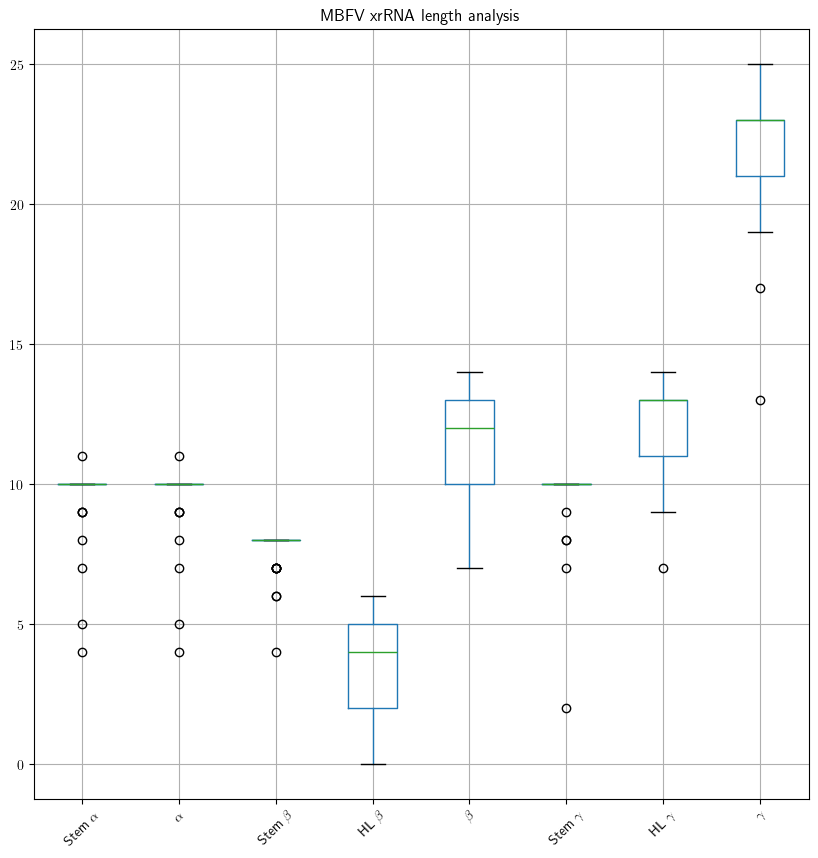

In [53]:


plt.rcParams['text.usetex'] = True

plt.figure(figsize=(10, 10))
df.boxplot()
plt.title('MBFV xrRNA length analysis')

#new_order = ['name', 'ST-I', 'IL-I', 'I', 'ST-II', 'HL-II', 'II', 'ST-III', 'HL-III', 'III', 'nt', 'until', 'after','uPK1','PK1bPK2']


labels = [r'Stem $\alpha$', r'$\alpha$', r'Stem $\beta$', r'HL $\beta$', r'$\beta$', r'Stem $\gamma$', r'HL $\gamma$', r'$\gamma$']

plt.xticks(list(range(1, len(labels)+1)), labels, rotation=45)
plt.xticks(rotation=45)

# plt.yticks(np.arange(0, 24, step=2))
#plt.xticklabels([r'$\frac{1}/{2}$', ''])
#plt.savefig('/scr/aldea/kgutenbrunner/working/thesis/images/xrRNA_analysis_boxplot.png')
plt.show()